# Deep Learning
# DL01 Aprendizaje Lineal Ejemplo Juguete

## <font color='blue'>**Resolvamos un problema lineal**</font>


1. Imaginemos que cada día compramos almuerzo en el supermercado. Siempre  se compra el mismo almuerzo: pollo, puré y ensaladas. Lo único  que varía es la cantidad de cada uno de los ingredientes. El cajero solamente nos entrega el valor total pagado y el peso (P) de cada una de las porciones. **¿Cuánto es valor de cada ingrediente ?**.

2. Tratemos de desarrollar un procedimiento heurístico, que permita ir actualizando los pesos de acuerdo a los montos cancelados en el supermercado.


Modelémoslo matemáticamente.

Al pollo lo denotamos por $Po$, al puré $Pu$ y las ensaladas $E$. Queremos averiguar los precios (por simpleza los asumimos estáticos), entonces planteamos las siguientes ecuaciones.

1. $Po \times X_{Po} + Pu \times X_{Pu} + E \times X_{E}$ = $Z_1$
2. $Po \times X_{Po} + Pu \times X_{Pu} + E \times X_{E}$ = $Z_2$
3. $Po \times X_{Po} + Pu \times X_{Pu} + E \times X_{E}$ = $Z_3$

### ¿Cómo lo resolvemos al estilo de redes neuronales?

Primero tenemos que tener un dataset. La función `getPortions()`, nos genera una porción diaria y su precio total. La función nos genera un vector de salida con los tamaños de porciones de los tres ingredientes (`pollo`, `ensalada` y `puré`), y el valor total del almuerzo.

In [ ]:
# Supongamos comenzamos con valores aleatorios.
import random
import numpy as np

# Esta funcion simula una entrega diaria.
def getPortions():
    uprice = [6200, 4160, 3200] # precio nitario por Kg
    chicken = random.uniform(0.1, 1) # porción de pollo en Kg
    salad = random.uniform(0.1, 1)
    mashedPotatoes = random.uniform(0.1, 1)
    price = chicken * uprice[0] + mashedPotatoes * uprice[1] + salad * uprice[2]
    # Noten que la función devuelve dos valores: una lista (x) y un float (y)
    return [chicken, mashedPotatoes, salad], price

In [ ]:
getPortions()

([0.43511161872287263, 0.2249943023155737, 0.18571384149790782],
 4227.952626507902)

### Vamos a iniciar los pesos.

Como son tres productos, iniciaremos 3 pesos.

In [ ]:
# Proceso de iniciación de los pesos de nuestra red.
# El proceso de iniciación puede ser de muchas formas: todos en 0, en 1, en -1,
# ajustado a alguna distribución, etc.
# La selección de estos valores debe ser cuidadosa ya que pueden afectar la velocidad
# de convergencia del algoritmo

def initValues(n):
    W = []
    for i in range(0, n):
        W.append(10000 * random.random())
    return W

W = initValues(3)
W

[4296.367046791563, 6653.149988486734, 7955.923377888809]

### Apliquemos un forward

$x$, son los valores de entrada generados por `getPortions()`

In [ ]:
# Aplicación de la red neuronal.
# Esto es un forward pass, un paso adelante en la neurona
# En esta operación se multiplican los valores de entreda de x con sus respetivos pesos
def forward(x, W):
    return np.dot(x, W)

In [ ]:
# realPrice -> y
x, realPrice = getPortions()
print(realPrice)
estimatePrice = forward(x, W)
print(estimatePrice)

9956.077884746494
12661.206801210461


### Estimemos el error

In [ ]:
# Estimar el error. Loss function.
# Esta es la función de pérdida, cuánto me estoy equivocando
def getDifference(realPrice, estimatePrice):
    return realPrice - estimatePrice

In [ ]:
difference = getDifference(realPrice, estimatePrice)
difference

-2705.1289164639675

### La propagación y actualización de los pesos

In [ ]:
[i for i in x]

[0.9268094412020143, 0.4844407990385178, 0.6858080079043041]

In [ ]:
# Etapa de optimización y propagación.
# Delta a corregir
def estimateDelta(x, difference):
    return [(difference/len(x)) * i for i in x]

# Actualizacion de las red neuronal.
# Esta es la magnitud en la que serán actualizados los pesos (W)
def updateWeights(deltas, W):
    return [a+b for a,b in zip(deltas, W)]

In [ ]:
deltas = estimateDelta(x, difference)
deltas

[-835.7130064824601, -436.8249379313348, -618.3996911081607]

In [ ]:
print('Pesos originales')
print(W)
print('Pesos actualizados')
print(updateWeights(deltas, W))

Pesos originales
[4296.367046791563, 6653.149988486734, 7955.923377888809]
Pesos actualizados
[3460.6540403091026, 6216.3250505554, 7337.523686780649]


### Pongamos todo junto

In [ ]:
W = initValues(3)
verbose = False
for i in range(0, 2000):
    # Pedimos una porcion
    x, realPrice = getPortions()
    if verbose: print(x, realPrice)
    estimatePrice = forward(x, W)
    if verbose: print(estimatePrice)
    difference = getDifference(realPrice, estimatePrice)
    if verbose: print(difference)
    deltas = estimateDelta(x, difference)
    if verbose: print(deltas)
    W = updateWeights(deltas, W)
print(W)

[6200.0, 4160.0, 3200.0]


<img src="https://drive.google.com/uc?export=view&id=1DNuGbS1i-9it4Nyr3ZMncQz9cRhs2eJr" width="100" align="left" title="Runa-perth">
<br clear="left">

## Resumen

1. **Redes neuronales**: Una red neuronal es un modelo computacional que se inspira en cómo las redes neuronales biológicas en el cerebro humano procesan información. Está compuesta por unidades llamadas neuronas, que están organizadas en capas. La información fluye a través de estas capas desde la entrada hasta la salida de la red. Las redes neuronales se utilizan en aprendizaje automático para hacer predicciones o clasificaciones.

2. **Forward Propagation (Propagación hacia adelante)**: Este es el proceso por el cual una red neuronal calcula su salida a partir de una entrada. Comienza en la capa de entrada, donde se toman los datos y se pasan a la primera capa oculta. Luego, se realiza una operación matemática entre la entrada y los pesos de la conexión (a menudo una suma ponderada), y el resultado se pasa a través de una función de activación. Este proceso se repite a través de todas las capas de la red hasta llegar a la capa de salida. En el ejercicio que propusiste, la propagación hacia adelante sería cómo la red toma los pesos de los ingredientes y produce un costo total para la comida.

3. **Función de Pérdida (Loss Function)**: Esta es una función matemática que mide la diferencia entre la salida predicha de la red y la salida real. Su propósito es cuantificar qué tan mal lo está haciendo la red. Durante el entrenamiento de la red, el objetivo es minimizar esta función. Un ejemplo común de función de pérdida es el error cuadrático medio (MSE), que es la media de los cuadrados de las diferencias entre las predicciones y los valores reales. En tu ejercicio, la función de pérdida podría medir la diferencia entre el costo total de la comida predicho por la red y el costo real proporcionado en los datos.

4. **Backpropagation (retropropagación)**: Es una técnica utilizada para entrenar redes neuronales. Cuando se realiza una predicción con la red, y esta predicción es incorrecta, la retropropagación ayuda a actualizar los pesos de las conexiones en la red de modo que la predicción se acerque más a la realidad. Esto se hace calculando el gradiente de la función de pérdida con respecto a cada peso, y luego actualizando los pesos en dirección opuesta al gradiente.

5. **Optimización por gradiente descendente**: Es una técnica de optimización que se utiliza para encontrar el valor mínimo de una función. Se basa en la observación de que si una función es diferenciable en un punto y el valor de la derivada en ese punto no es cero, entonces la función está disminuyendo en la dirección del gradiente negativo. El algoritmo toma pasos sucesivos en la dirección opuesta al gradiente de la función en el punto actual, hasta alcanzar un mínimo.

6. **Tensor**: Un tensor es una generalización de vectores y matrices y es una forma clave de manipular datos en aprendizaje profundo. En términos simples, un tensor es una matriz de datos con un número variable de ejes. Un número real es un tensor de orden 0, un vector es un tensor de orden 1, una matriz es un tensor de orden 2, y así sucesivamente.

En términos sencillos, durante el entrenamiento de una red neuronal, primero se realiza la propagación hacia adelante para obtener la predicción de la red. Luego, se calcula la función de pérdida para determinar qué tan lejos está esta predicción del valor real. A continuación, se utiliza la retropropagación para calcular el gradiente de la función de pérdida con respecto a los pesos de la red. Finalmente, se utiliza el gradiente descendente para actualizar los pesos de la red en la dirección que reduce la función de pérdida. Se repite este proceso muchas veces hasta que la función de pérdida no disminuye significativamente, lo que significa que la red ha sido entrenada.

En el ejercicio propuesto, se quiere determinar el precio de tres ingredientes (pollo, puré y ensaladas) a partir de información sobre el costo total de las comidas y el peso de los ingredientes en cada comida.

Este problema se puede resolver utilizando el concepto de regresión lineal. En regresión lineal, tratamos de ajustar una línea (o un hiperplano en dimensiones superiores) a un conjunto de puntos de datos de tal manera que la suma de las distancias verticales entre los puntos y la línea sea mínima. En este caso, los precios de los ingredientes serían los coeficientes de la línea que estamos tratando de ajustar, y los costos totales serían los valores que estamos tratando de predecir.

Podemos utilizar una red neuronal con una sola capa y una función de activación lineal para resolver este problema. La función de pérdida podría ser el error cuadrático medio entre las predicciones y los valores reales. Usaríamos la retropropagación y la optimización por gradiente descendente para minimizar la función de pérdida y determinar los precios de los ingredientes. En el contexto de este problema, un tensor podría ser útil para almacenar la información sobre el peso de los ingredientes en cada comida y los costos totales correspondientes.

## <font color='green'>**Actividad 1**</font>

Adaptar el código para aceptar el precio de 5 productos.

<font color='green'>**Fin Actividad 1**</font>

<img src="https://drive.google.com/uc?export=view&id=1Igtn9UXg6NGeRWsqh4hefQUjV0hmzlBv" width="100" align="left" title="Runa-perth">
<br clear="left">



### Enseñémosle a una neurona a calcular temperaturas

En la siguiente sección, profundizaremos en la construcción de nuestra neurona e incorporaremos algunos conceptos adicionales.

In [ ]:
celsius = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float).reshape(7,1)
farenheit = np.array([-40, 14, 32, 46, 59, 72, 100], dtype=float).reshape(7,1)

In [ ]:
celsius.shape[0]

7

<function matplotlib.pyplot.show(close=None, block=None)>

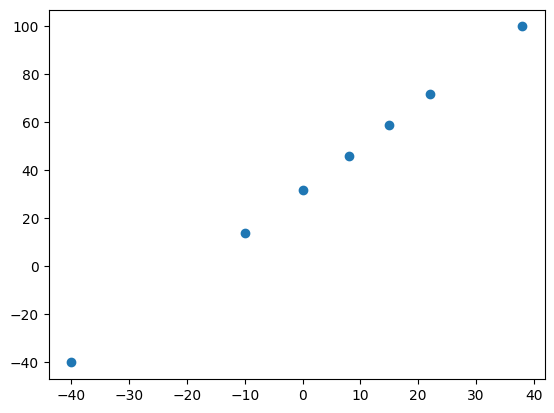

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(celsius, farenheit)
plt.show

La función regresora es de la forma

$$\hat{y} = w_0 +  w_1x$$

In [ ]:
# Añadiremos una columna de 1 al vector 'celsius' y lo llamaremos X por convención
# Creamos una vector columna de 1, con la cantidad de filas de celsius
ones = np.ones(celsius.shape[0]).reshape(7,1)
# Lo concatenamos con el vector celsius
X = np.concatenate([ones, celsius], axis=1)
X

array([[  1., -40.],
       [  1., -10.],
       [  1.,   0.],
       [  1.,   8.],
       [  1.,  15.],
       [  1.,  22.],
       [  1.,  38.]])

In [ ]:
# solo para respetar las convenciones, llamaremos 'Y' al vector con los valore reales
# en nuetro caso el vector 'farenheit'
Y = farenheit.reshape(7, 1)
Y

array([[-40.],
       [ 14.],
       [ 32.],
       [ 46.],
       [ 59.],
       [ 72.],
       [100.]])

El vector de pesos es conocido en la literatura como $W$ o $\:\theta$. Utilizaremos ambas nomenclaturas indistintamente.

In [ ]:
# Creamos nuestro vector de pesos w0 y w1, y lo inicializamos con ceros
W = [0, 0]


Si recuerdas, en la red neuronal hay dos tipos de parámetros: los pesos $W$ y el término de sesgo $b$.
<br>
<br>
$$\hat{y} = b + w_1x_1$$
<br>
Por convención llamamos $w_0$ a $b$, y obtenemos nuestra ecuación original
<br>
<br>
$$\hat{y} = w_0 + w_1x_1$$
<br>

A partir de esta ecuación, podemos encontrar la mejor recta que representa los datos utilizando el __Error Cuadrático Medio (ECM__, en inglés __MSE)__ como estimador y los __Mínimos Cuadrados Ordinarios (MCO__, en inglés __OLS)__ como función de costo __$J$__ la cual buscará minimizar el __MSE__.
<br>
<br>
$$MSE = \frac{1}{m}\sum^m_{i=1}{(y_i - \hat{y}_i)^2}$$
<br>
El Error Cuadrático Medio expresado de forma vectorial es:
<br>
<br>
$$(Y-XW)^T\;(Y-XW)$$
<br>
Recordemos además que el mínimo de una función lo podemos encontrar igualando su derivada a cero. Luego si derivamos nuestra función de costo podemos minimizar el error. La derivada de la función igualada a cero es:
<br>
<br>
$$-2X^TY + 2X^TXW = 0$$
<br>
Despejando $W$, obtendremos la combinación de parámeros que minimiza la función de costo.
<br>
<br>
$$W = (X^TX)^{-1}X^TY$$
<br>





Este método es muy sencillo y directo ya que nos permite obtener los parámeros $W$ en un único paso y una única ecuación. Sin embargo, nos daremos cuenta que no siempre podremos enontrar el mínimo de nuestra función de costo de forma analítica, sobre todo si tenemos un problema a resolver con muchas variables, como suele suceder. Si tenemos muchas variables en nuestro modelo, este  método puede resultar muy ineficiente computacionalmente ya que debemos invertir una matriz, $(X^TX)^{-1}$, lo cual tiene una complejidad de $O(n^3)$, es decir, no escala adecuadamente cuando nuestra ecuación (el tamaño de la matriz $X$) es muy compleja, digamos del estilo:
<br>
<br>
$$\hat{y} = w_0 + w_1x_1 + w_2x_2 \dots + w_nx_n$$


In [ ]:
def min_cuadrados_ordinarios(X, Y):
    """
    Esta función entrega el min de la función de coste
    La función de coste es el MCE
    """
    return np.linalg.inv(X.T @ X) @ X.T @ Y


In [ ]:
# La primera parte de la expresión retornada es una matriz que es ...
(np.linalg.inv(X.T @ X)  @ X.T).shape

(2, 7)

In [ ]:
# ... multiplicable por la matriz Y
Y.shape

(7, 1)

In [ ]:
# Obtenemos a un único paso los valores óptimos para W
W = min_cuadrados_ordinarios(X, Y)
print(f'W0:          {W[0][0]:0.1f},\nW1:          {W[1][0]:0.1f}')

W0:          32.0,
W1:          1.8


In [ ]:
# Veamos si funciona, sabemos que -10ºC equivalen a 14ºF
c = -10
f = W[0] + W[1] * c
round(f[0], 1)

14.0

Perfecto!!!
Pero, tal como comentamos, si nuestro modelo tiene muchas variables, nuestra matriz será muy grande también y el modelo se tornará computacionalmente ineficiente. Vamos a necesitar otra manera de reducir el costo. El segundo método se denomina __Descenso del Gradiente__ (__Gradient Descent__), y es un método fundamental en las redes neuronales.

Para explicar brevemente el descenso de pendientes, imagina que estás en un terreno como el de la imagen y que tu misión es llegar a la zona más baja de toda esta superficie.
<br>
<img src="https://drive.google.com/uc?export=view&id=1eGiOCbMf7i1Q86dHVhMyRwPBa-lcrA9Y" width='500' text="test-geologia">
<br>

Sin embargo, no tienes un mapa del terreno, no lo conoces de forma previa y, por si fuera poco, tienes los ojos vendados. Lo que tienes que hacer es tantear con el pie la  inclinación del sitio donde te encuentras y moverte un paso en la dirección hacia donde la pendiente descienda con mayor intensidad. Luego, lo que hacemos es evaluar donde está la mayor pendiente, damos un paso en esa dirección y nos detenemos. En la nueva posición volvemos a repetir el proceso y seguimos así, iterativamente, hasta que razonablemente no encontramos una dirección en la cual la pendiente descienda.

Traduzcamos esto a matemáticas. Imaginate que la siguiente figura es nuestra función de costo. Acá la vemos tridimencional, pero podría ser perfectamente un espacio n-dimencional.

<br>
<img src="https://drive.google.com/uc?export=view&id=1D6KvMl2lKA7KKUFIXH4k4ifd-8lE_f6S" width='500' text="funcion de costo">
<br>

Los ejes $x$ e $y$, en le plano, corresponden a nuestros parámetros, y el eje $z$, en la vertical, al tamaño de nuestro error. Cuando iniciamos nuestro entrenamiemto, inicializamos nuestros parámetros ($W$) con un valor aleatorio, esto equivale a iniciar el descenso en un punto también aleatorio en esta superfice.
<br>
<img src="https://drive.google.com/uc?export=view&id=1yeL-UUhPVNm1lgzvC-zDr1lGiBD-nLrj" width='500' text="funcion de costo punto">
<br>
En este punto debemos evaluar la pendiente en la que nos encontramos. Para ello, como nuestra función es multidimensional, deberemos calcular las derivadas paraciales respecto de cada uno de los parámetros. Matemáticamente lo escribimos así:

__Función de costo ($J(theta)$)__
$$J(\theta) = \frac{1}{2}m \sum_{i=1}^{m}{(h(\theta^i - y^i)^2}$$
<br><br>
con $m$ = número de observaciones

__Gradient__
$$\frac{\partial J(\theta)}{\partial\theta_j} = \frac{1}{m} \sum_{i=1}^{m}{(h(\theta^i - y^i)\cdot X_j^i}$$
<br>
esto es, la derivada parcial de la función de error en función de cada dimensión de nuestro modelo de conversión de Celsius a Ferenheit.
<br><br>
$$\frac{\partial error}{\partial \theta_1}$$
<br>
$$\frac{\partial error}{\partial \theta_2}$$
<br>
Cada una de estas derivadas, nos dirá cual es la pendiente para dicho parámetro. Conjuntamente todos estos vectores (estas direcciones, indicadas con vectores rojos) conforman un vector (negro) que nos indica la pendiente hacia la cual la pendiente asciende. Este vector se denomina el __gradiente__.
<br>
<img src="https://drive.google.com/uc?export=view&id=1wrw2iFN8pIoPDRH9THmrKiM1OQziC7GL" width='500' text="funcion de costo gradiente">
<br>
Ahora bien, como el gradiente nos indica la dirección para subir, si lo restamos, obtendremos la dirección de bajada.
<br>
<img src="https://drive.google.com/uc?export=view&id=1FMMZzVut3aHkv2WGLGavXr4DEFxI_xPn" width='500' text="funcion de costo bajada">
<br>
Matemáticamente lo escribimos así:<br>

$$\theta := \theta - \nabla f$$

donde $\nabla f$ es representa a función de la derivada parcial de nuestra función de error: $ \frac{\partial J(\theta)}{\partial\theta_j}$

La ecuación anterior, nos da un nuevo conjunto de parámetros, los cuales no llevan a un nuevo punto, en el cual repetimos el proceso de forma iterativa hasta alcanzar un punto en el cual volver a movernos no suponga una variación relevante en el costo. En este pounto, habremos encontrado un mínimo. Sin embargo, no sabremos a priori si es un mínimo local o global.
<br>
<img src="https://drive.google.com/uc?export=view&id=17pP0g_knTWTPKbm5vj4wjjSlhH0E3vhP" width='500' text="funcion de costo bajada 2">
<br>
Para que nuesro algoritmo esté completo, nos falta incorporar un parámetro adicional el cual llamaremos __learning rate__, o simplemente __$\alpha$__, el cual controla cuanto afecta el gradiente a la actualización de nuestros parámetros, es decir, el largo de nuestro paso. La ecuación queda de la siguiente forma:
<br>
$$\theta := \theta - \alpha\nabla f$$
<br>
<br>
Esto es muy importante ya que definirá el comportamiento general de nuestro modelo al determinar si el algoritmo converge o no y a qué velocidad lo hace.
Un __Learning Rate__ muy pequeño demorará mucho en converger; por el contrario, uno muy grande puede que no converja nunca. Veamos por ejemplo una fución cosenoidal.
<br>
<img src="https://drive.google.com/uc?export=view&id=1-i3ofqG9yoobvLkqdkhM-SzxIQTQQabM" width='300' text="cos_1">
<br>
Como podemos ver, la funcción tiene muchos mínimos locales. El descenso del gradiente encontrará diferentes mínimos dependiendo del punto de partida en la función y del tamano de nuestro paso (Learning rate). Si partimos desde $x_= 6$ y $\alpha = 0.2$, el algoritmo se mueve como se observa en la siguiente gráfica.
<br>
<img src="https://drive.google.com/uc?export=view&id=1oon6-zaONOHXnstMagmFR2miHFX2DtFu" width='300' text="cos_2">
<br>
Si usamos el mismo $x_0$, pero un $\alpha = 1.5$ el tamaño de paso es demasiado grande para que el descenso de gradiente converja al mínimo.
<br>
<img src="https://drive.google.com/uc?export=view&id=1xFgm6DfrkpT-xKokGnl_L9FqN-NV7Xuc" width='300' text="cos_3">
<br>
Y si usamos $x_0 = 7$ y $\alpha = 0.2$, descendemos en un mínimo local completamente diferente.
<br>
<img src="https://drive.google.com/uc?export=view&id=14_ZzsAgPe_HIYqLP78Ezsqbio_anFsyQ" width='300' text="cos_4">
<br>
Dentro de las limitaciones del decenso del gradiente están el hecho que falla para funciones no diferenciables:
<br>
<img src="https://drive.google.com/uc?export=view&id=1JJFJX2M1yLJZZmB463FhPekT8jM-bnUK" width='300' text="funcion no diferenciable">
<br>

Y también por su tendencia a quedar atrapado en mínimos locales (en lugar del mínimo global). Tan pronto como el algoritmo encuentra algún punto que sea un mínimo local, nunca escapará mientras el tamaño de paso no exceda el tamaño del foso.
<br>
<img src="https://drive.google.com/uc?export=view&id=1OYbP-8kxccqe7ofbxy4K9IMSGexm3M2u" width='400' text="minimo local 1">

<br>
<img src="https://drive.google.com/uc?export=view&id=1C848aPu52jQVdkQzdmtMqDeQKA4JVEDI" width='400' text="minimo local 2">
<br>


In [ ]:
def prediction(X, W):
    """
    Calcula los valores de y_hat en base a multiplicar la matriz de de entrada
    X y los pesos W (o theta)
    """
    return np.dot(X, W)

def cost(y, y_hat, verbose=True):
    """
    Calcula la función de costo o pérdida

    1/2 * m * (y_hat - y)**2).mean()
    o, simplificando
    (y_hat - y)**2).mean()
    """
    m = len(y)
    error = (1/2 * m) * np.sum(np.square(y_hat - y))
    if verbose: print("Error = ", error)
    return error

def gradient(X, y, W, learning_rate=0.01, epochs=100, verbose=True):
    '''
    X = Matriz con registros originales y con las unidades de bias incluidas
    y = Vector valores originales
    W = Vector de pesos del tipo np.random.randn(j,1)
    learning_rate = tasa de aprendizaje
    epochs = número de iteraciones

    Devuelve el vector W final y la matriz del historial de costos después
    de realizar 'epoch' iteraciones
    '''

    m = len(y)
    cost_history = np.zeros(epochs)
    W_history = np.zeros((epochs, W.shape[0]))

    for i in range(epochs):
        if verbose: print("Epoch: ", i+1)
        y_hat = prediction(X, W)
        if verbose: print("y_hat = \n", y_hat)
        W = W - (1/m) * learning_rate * (X.T.dot((y_hat - y)))
        if verbose: print("W = \n", W)
        W_history[i,:] = W.T
        y_hat = prediction(X, W)
        cost_history[i]  = cost(y_hat, y, verbose)

    return W, cost_history, W_history

In [ ]:
lr =0.001
epoch = 6000

W = np.zeros((2,1))
print(f'Pesos iniciales en W: \n {W}\n')
W, cost_history, W_history = gradient(X, Y, W, lr, epoch, False)

print(f'W0:          {W[0][0]:4.1f}\nW1:          {W[1][0]:>4.1f}\n')
print(f'Costo Final (MSE):  {cost_history[-1]:0.3f}')

Pesos iniciales en W: 
 [[0.]
 [0.]]

W0:          31.9
W1:           1.8

Costo Final (MSE):  1.781


Volvemos a obtener los pesos finales $W_0$ y $W_1$, pero esta vez utilizando al rededor de 6000 iteraciones (epochs).

Veamos gráficamente como el algoritmo se converge.

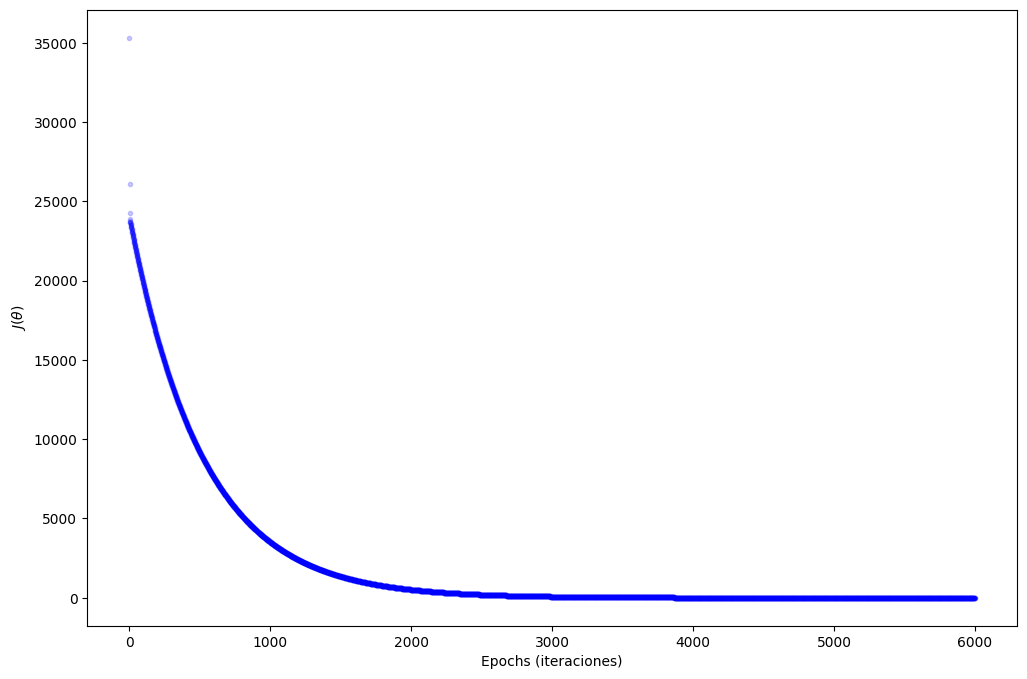

In [ ]:
fig,ax = plt.subplots(figsize=(12,8))
plt.ylabel(r'$J( \theta )$')
plt.xlabel('Epochs (iteraciones)')
plt.plot(range(epoch), cost_history,'b.', alpha=0.2)
plt.show()

Vemos que en torno a las 3000 iteraciones, el costo es fijo, por lo que las iteraciones restantes no son necesarias o no darán como resultado ninguna optimización adicional. El costo cae más rápido inicialmente y luego la ganancia en la reducción de costos se hace cada vez menor. Acerquémonos hasta la iteración 2800 y veamos la curva.

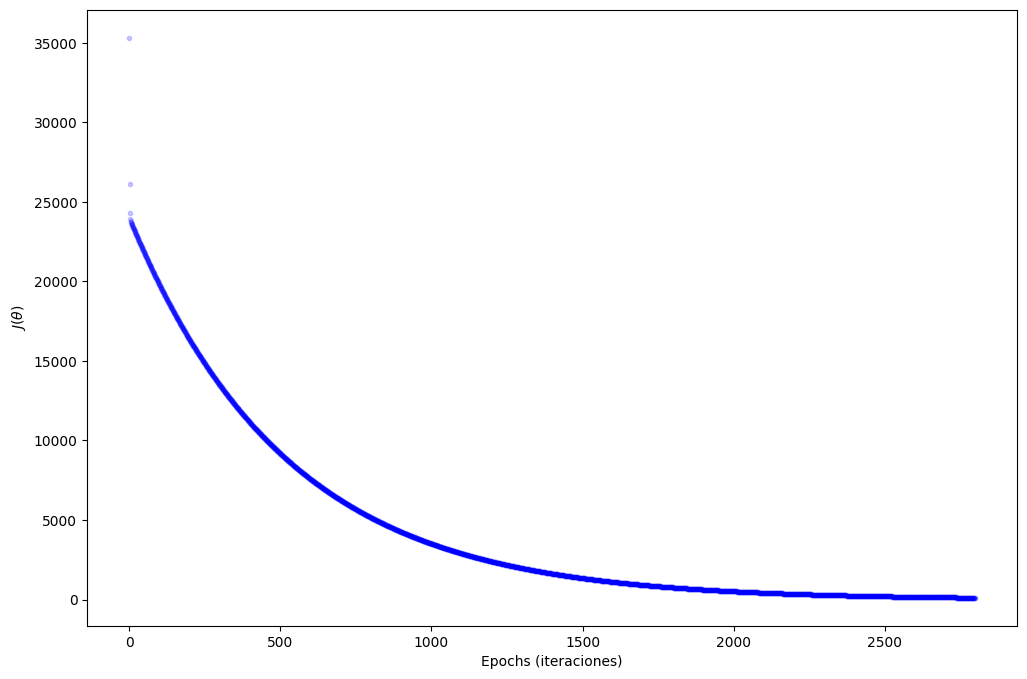

In [ ]:
fig,ax = plt.subplots(figsize=(12,8))
plt.ylabel(r'$J( \theta )$')
plt.xlabel('Epochs (iteraciones)')
plt.plot(range(2800), cost_history[:2800],'b.', alpha=0.2)
plt.show()

Inicialicemos el vector $W$ con valores aleatorios y no con ceros.

Pesos iniciales en W: 
 [[ 1.09821994]
 [-1.03427301]]

W0:          31.9
W1:           1.8

Costo Final (MSE):  1.765


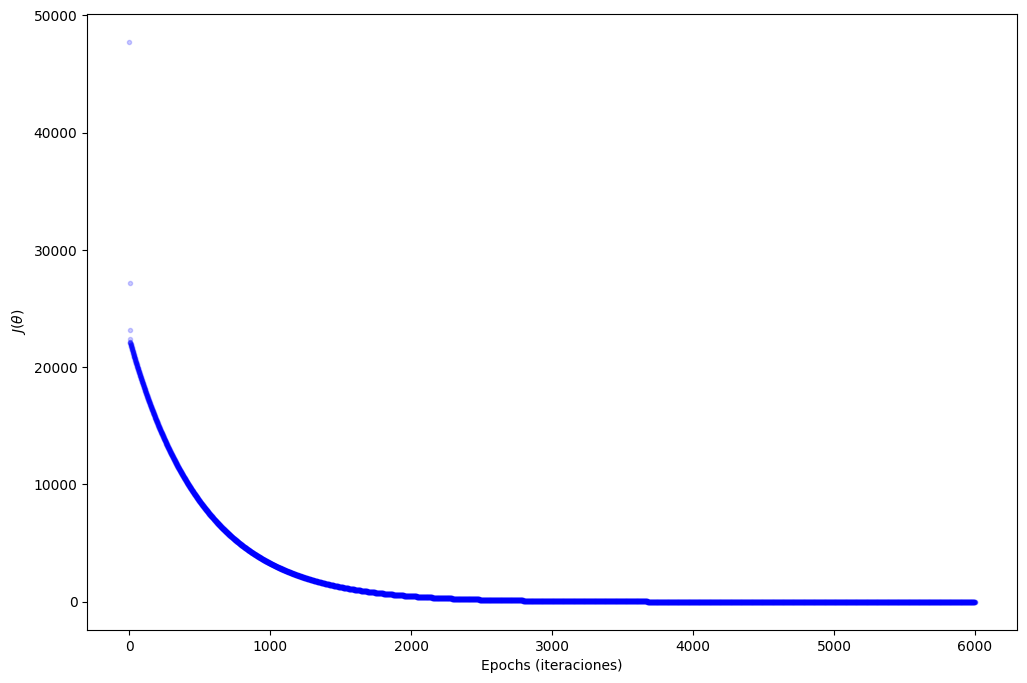

In [ ]:
lr =0.001
epoch = 6000

W = np.random.randn(2,1)
print(f'Pesos iniciales en W: \n {W}\n')
W, cost_history, W_history = gradient(X, Y, W, lr, epoch, False)

print(f'W0:          {W[0][0]:4.1f}\nW1:          {W[1][0]:>4.1f}\n')
print(f'Costo Final (MSE):  {cost_history[-1]:0.3f}')

fig,ax = plt.subplots(figsize=(12,8))
plt.ylabel(r'$J( \theta )$')
plt.xlabel('Epochs (iteraciones)')
plt.plot(range(epoch), cost_history,'b.', alpha=0.2)
plt.show()

Comparemos esta ejecución de 6000 iteraciones con un _Learning Rate_ igual a 0.001, con otros valores para $lr$. Observen el aumento significativo en la cantidad de iteraciones para alcanzar la convergencia conforme el parámetro se hace más pequeño.

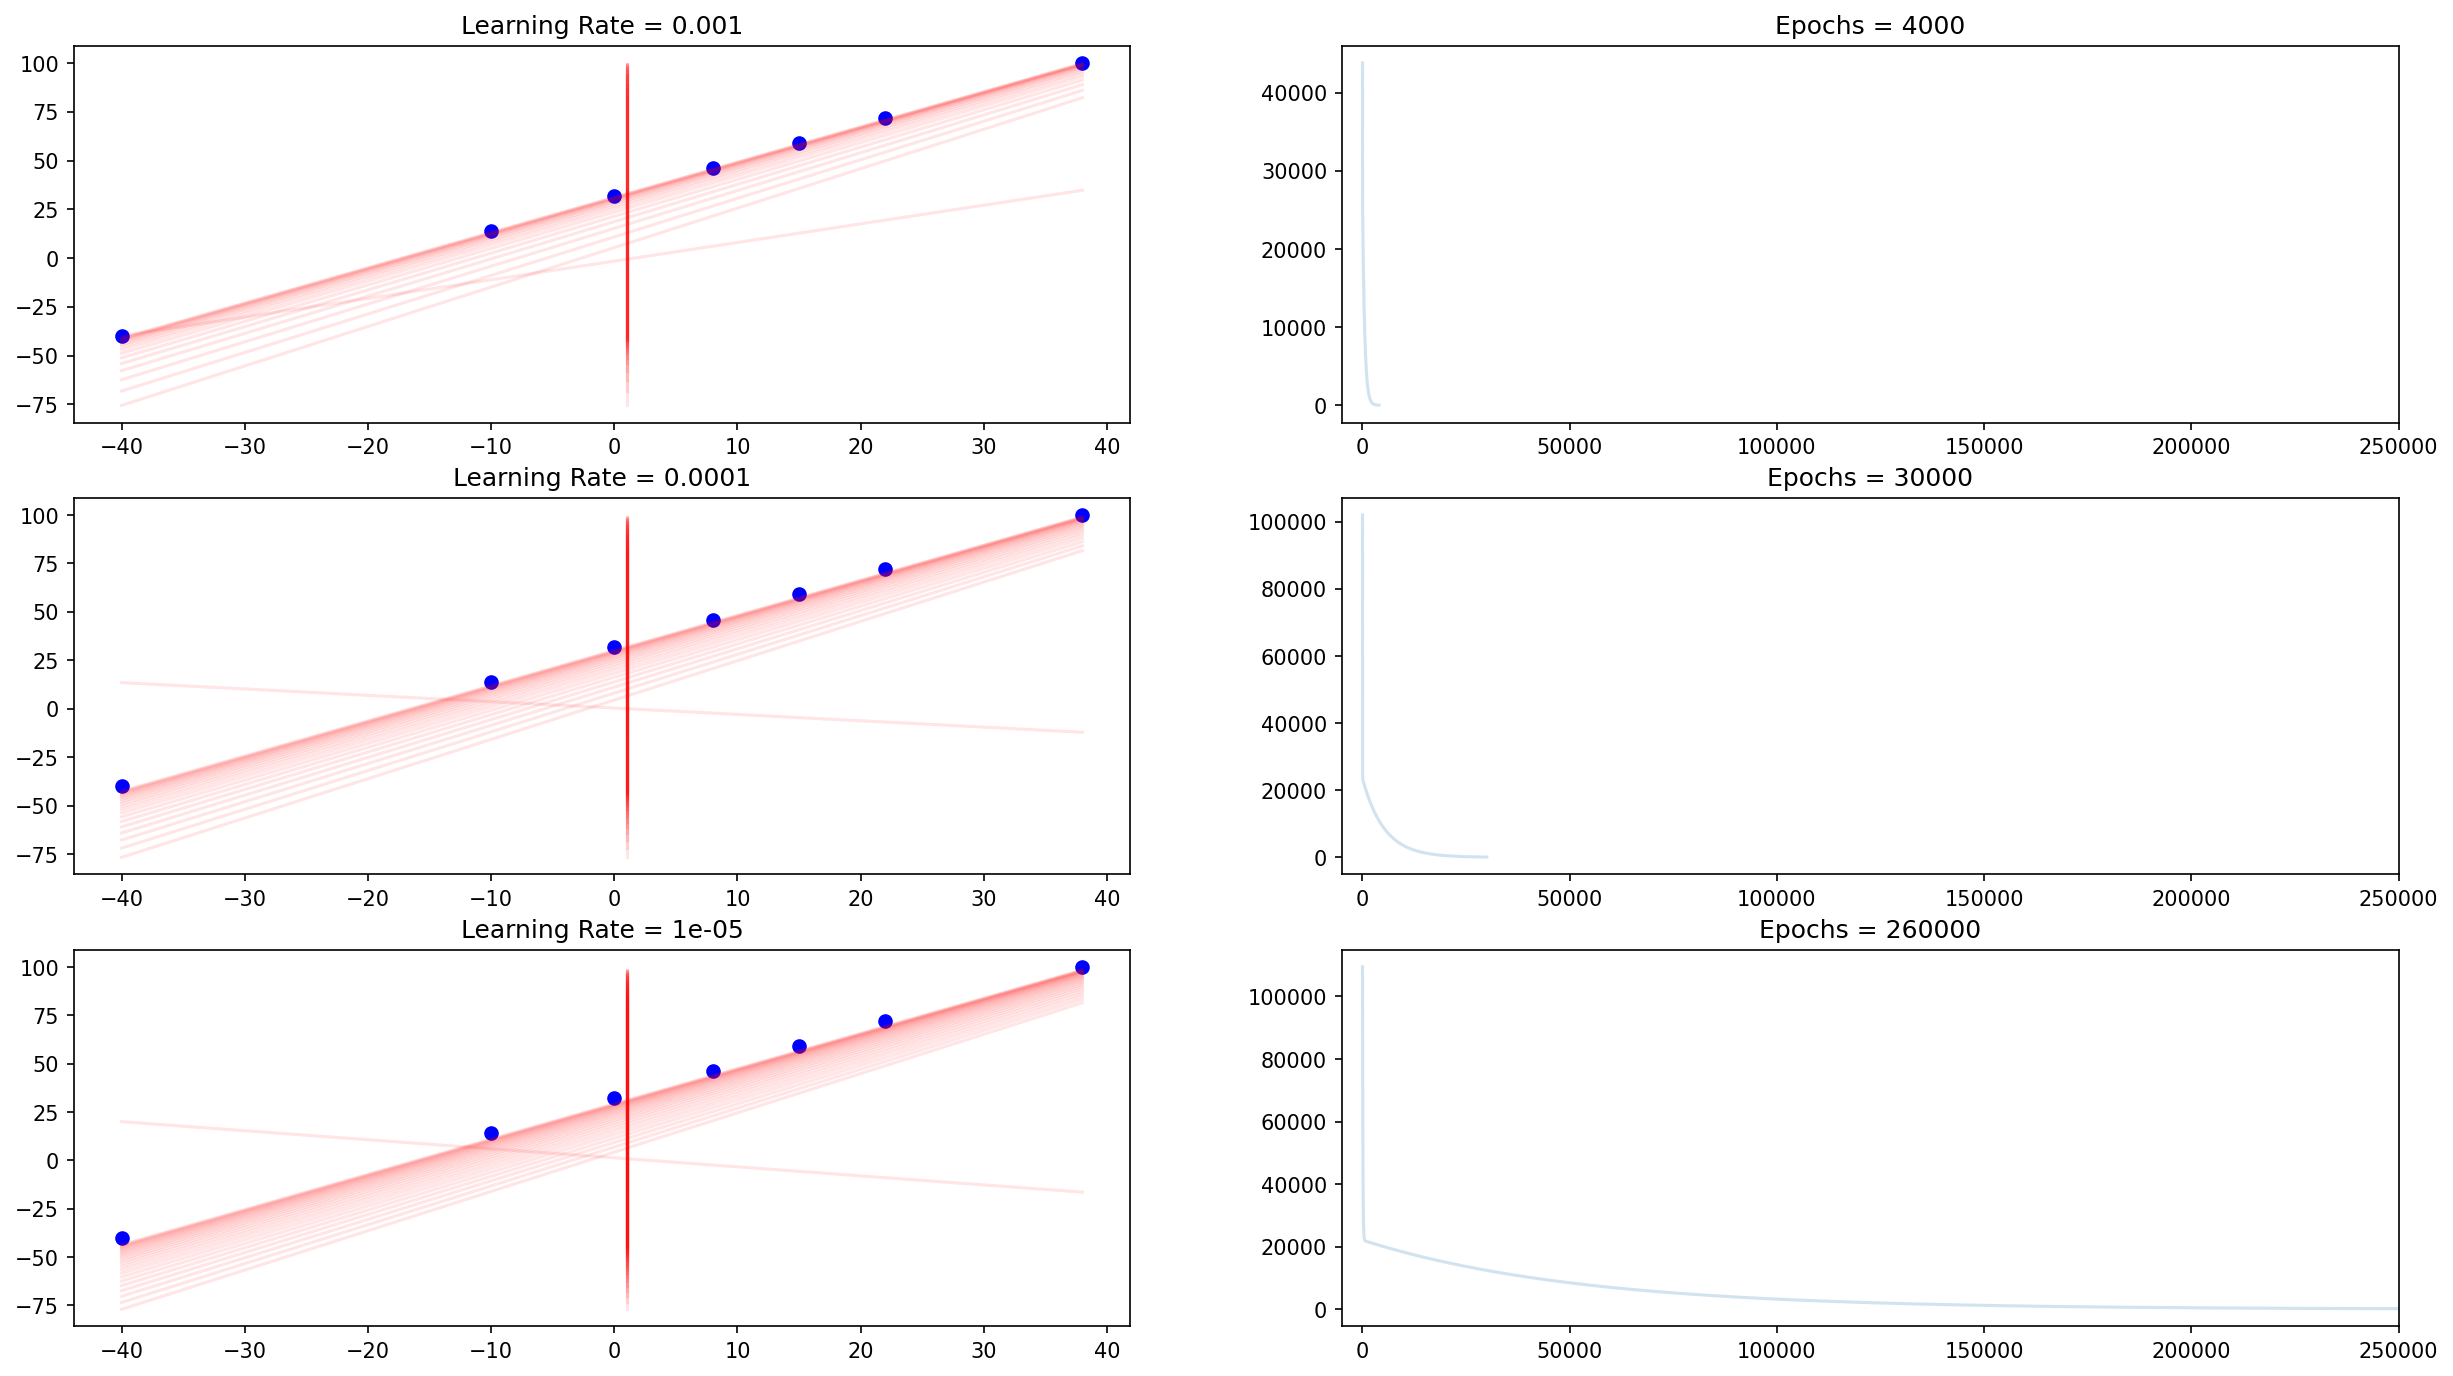

In [ ]:
fig = plt.figure(figsize=(20,15),dpi=150)
fig.subplots_adjust(hspace=0.2, wspace=0.2)

lr =[0.001, 0.0001, 0.00001]
epoch = [4000, 30000, 260000]
count = 0
tr = 0.1 # Transparency
for lr, e in zip(lr, epoch):
    count += 1
    W = np.random.randn(2,1)
    W, cost_history, W_history = gradient(X, Y, W, lr, e, False)


    ax = fig.add_subplot(4, 2, count)
    ax.scatter(X[:, 1], Y, color='b')
    for i in range(e):
        lines = round(e / np.log(e**2))
        tr_i = 0.8 / lines
        if i % lines == 0:
            pred = X.dot(W_history[i])
            ax.plot(X, pred,'r-', alpha=0.1)
            tr += tr_i
    count += 1

    ax1 = fig.add_subplot(4, 2, count)
    ax1.plot(range(e), cost_history, c, alpha=0.2)
    plt.xlim(-5000, 250000)
    ax.set_title(f"Learning Rate = {lr}")
    ax1.set_title(f"Epochs = {e}")
plt.show()


Learning rate = 0.001
Epochs = 3000
W0:          30.2
W1:           1.8

Costo Final (MSE):  76.846

Learning rate = 0.0001
Epochs = 30000
W0:          30.2
W1:           1.8

Costo Final (MSE):  77.034

Learning rate = 1e-05
Epochs = 260000
W0:          29.3
W1:           1.8

Costo Final (MSE):  164.327



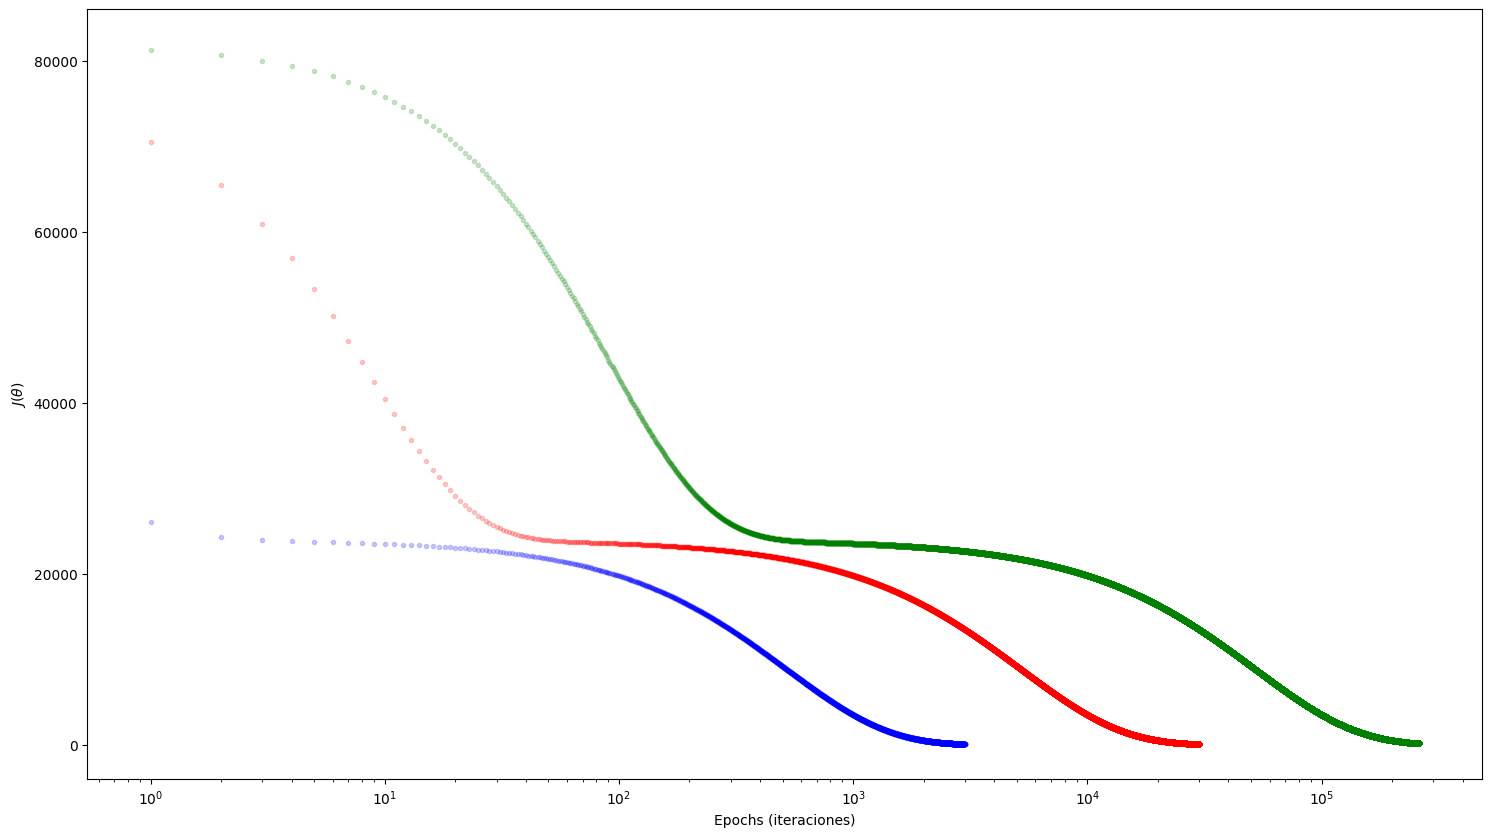

In [ ]:
lr =[0.001, 0.0001, 0.00001]
color = ['b.', 'r.', 'g.']
epoch = [3000, 30000, 260000]
fig,ax = plt.subplots(figsize=(18,10))
for lr, e, c in zip(lr, epoch, color):
    W = np.zeros((2,1))
    W, cost_history, W_history = gradient(X, Y, W, lr, e, False)
    plt.plot(range(e), cost_history, c, alpha=0.2)
    print(f"Learning rate = {lr}")
    print(f"Epochs = {e}")
    print(f'W0:          {W[0][0]:4.1f}\nW1:          {W[1][0]:>4.1f}\n')
    print(f'Costo Final (MSE):  {cost_history[-1]:0.3f}\n')
plt.xscale("log")
plt.ylabel(r'$J( \theta )$')
plt.xlabel('Epochs (iteraciones)')
plt.show()

<font color='green'>**Fin actividad 1**</font>

<img src="https://drive.google.com/uc?export=view&id=1Igtn9UXg6NGeRWsqh4hefQUjV0hmzlBv" width="100" align="left" title="Runa-perth">
<br clear="left">



## Ejercicio Avanzado

Ejercicio: Predicción de la demanda de energía

Supongamos que trabajas para una compañía de suministro eléctrico y quieres predecir la demanda de energía en la próxima semana para poder administrar mejor los recursos de la compañía. Tienes datos históricos sobre la demanda de energía cada día durante los últimos meses, así como información sobre las temperaturas diarias y si esos días eran festivos o no.

Tu objetivo es crear una red neuronal que tome como entrada las temperaturas y la información sobre los días festivos y prediga la demanda de energía para los próximos siete días.

Pasos para resolver este ejercicio:

Preparación de los datos: Divide tus datos en un conjunto de entrenamiento y un conjunto de prueba. Utiliza el conjunto de entrenamiento para entrenar tu red y el conjunto de prueba para evaluar su rendimiento.

Diseño de la red neuronal: Crea una red neuronal con una capa de entrada, algunas capas ocultas y una capa de salida. La capa de entrada debe tener dos neuronas (una para la temperatura y otra para la información sobre los días festivos). La capa de salida debe tener siete neuronas, una para cada día de la semana que vas a predecir.

Función de activación: Usa funciones de activación apropiadas para las capas ocultas (por ejemplo, ReLU) y la capa de salida (por ejemplo, lineal).

Función de pérdida: Como este es un problema de regresión, utiliza el error cuadrático medio (MSE) como función de pérdida.

Entrenamiento de la red: Utiliza propagación hacia adelante y retropropagación para entrenar la red en el conjunto de entrenamiento. Aplica el algoritmo de gradiente descendente para optimizar los pesos de la red y minimizar la función de pérdida.

Evaluación del modelo: Utiliza el conjunto de prueba para evaluar el rendimiento de tu modelo. Calcula el error cuadrático medio entre las predicciones y los valores reales en el conjunto de prueba.

Análisis de resultados: Analiza tus resultados. ¿Qué días fueron más difíciles de predecir? ¿Hay alguna relación entre la temperatura y la demanda de energía? ¿Cómo afectan los días festivos a la demanda de energía?

Este ejercicio te permitirá practicar la creación y el entrenamiento de una red neuronal, así como la interpretación de los resultados en un contexto real. Además, te ayudará a comprender la importancia de la preparación de datos y la selección de una función de pérdida adecuada para el problema que estás resolviendo.

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Generar datos de ejemplo
np.random.seed(42)
temperaturas = np.random.rand(100, 1) * 10 + 20  # Temperaturas entre 20 y 30 grados
dias_festivos = np.random.randint(0, 2, size=(100, 1))  # 0 si no es festivo, 1 si es festivo
demanda = temperaturas * 5 - dias_festivos * 50 + np.random.normal(0, 5, size=(100, 1)) + 50  # Fórmula de demanda más realista



### Solucion

In [ ]:


# Dividir los datos en entrenamiento y prueba
X = np.hstack((temperaturas, dias_festivos))
y = demanda
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Crear la red neuronal
model = Sequential()
model.add(Dense(16, input_dim=2, activation='relu'))  # Capa oculta con 16 neuronas
model.add(Dense(16, activation='relu'))  # Otra capa oculta con 16 neuronas
model.add(Dense(1, activation='linear'))  # Capa de salida con 1 neurona

# Compilar el modelo
model.compile(loss='mean_squared_error', optimizer='adam')

# Entrenar el modelo
model.fit(X_train, y_train, epochs=500, batch_size=10)

# Predecir la demanda en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')



Epoch 1/500
8/8 [==============================] - 1s 4ms/step - loss: 23658.5352
Epoch 2/500
8/8 [==============================] - 0s 3ms/step - loss: 23629.9277
Epoch 3/500
8/8 [==============================] - 0s 3ms/step - loss: 23598.6777
Epoch 4/500
8/8 [==============================] - 0s 3ms/step - loss: 23564.8906
Epoch 5/500
8/8 [==============================] - 0s 3ms/step - loss: 23526.3555
Epoch 6/500
8/8 [==============================] - 0s 3ms/step - loss: 23483.3633
Epoch 7/500
8/8 [==============================] - 0s 3ms/step - loss: 23432.3008
Epoch 8/500
8/8 [==============================] - 0s 3ms/step - loss: 23374.8086
Epoch 9/500
8/8 [==============================] - 0s 3ms/step - loss: 23309.1895
Epoch 10/500
8/8 [==============================] - 0s 3ms/step - loss: 23234.0723
Epoch 11/500
8/8 [==============================] - 0s 3ms/step - loss: 23151.1250
Epoch 12/500
8/8 [==============================] - 0s 3ms/step - loss: 23056.8164
Epoch 13/500
